
**Task1.Data Collection and Preprocessing (4 Marks):**

•Task: Select an appropriate dataset and perform data preprocessing,
including data cleaning, feature engineering, and scaling/normalization.
•Details: Explain the choices made during preprocessing and how they
impact the model. Use KizenML or other tools for AutoEDA if applicable.
•Marks: 4 Marks




##Importing Libreries

In [1]:
!pip install tpot

# Install sweetviz
!pip install sweetviz
!pip install shap

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
      --------------------------------------- 0.0/1.1 MB 330.3 kB/s eta 0:00:04
     - -------------------------------------- 0.0/1.1 MB 495.5 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.1 MB 655.4 kB/s eta 0:00:02
     ----------- ---------------------------- 0.3/1.1 MB 1.7 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 4.8 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/87.4 kB ? eta -:--:--
   ---------------------------------------- 87.4/87.4 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   -----------------------------

In [4]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tpot import TPOTClassifier
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings('ignore')
# from google.colab import drive
import os
from os import listdir
import xgboost

In [6]:
# drive.mount("/content/drive")
# winequality_red_path   = "/content/drive/MyDrive/data/MLOPS/winequality-red.csv"
# winequality_white_path = "/content/drive/MyDrive/data/MLOPS/winequality-white.csv"
winequality_white_path = "winequality-white.csv"

# Data Preparation

In [ ]:

#Load the wineequality-red.csv data
df1=pd.read_csv(winequality_red_path,sep=",")
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#Load the wineequality-white.csv data
df2=pd.read_csv(winequality_white_path,sep=";")
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
# # Check for missing values
# print(df1.isnull().sum())

# # Get basic statistics
# print(df1.describe())

# Check for missing values
print(df2.isnull().sum())

# Get basic statistics
print(df2.describe())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dio

##Data Preprocessing

In [ ]:
#concate two datasets
df=pd.concat([df1,df2],axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#printing mean,min,max of two dataset
print(df1['quality'].mean(),df2['quality'].mean(),df1['quality'].max(),df2['quality'].min(),df1['quality'].max(),df2['quality'].min())

5.6360225140712945 5.87790935075541 8 3 8 3


In [ ]:
#printing count of each quality category of both dataset
df1['quality'].value_counts(),df2['quality'].value_counts()

(quality
 5    681
 6    638
 7    199
 4     53
 8     18
 3     10
 Name: count, dtype: int64,
 quality
 6    2198
 5    1457
 7     880
 8     175
 4     163
 3      20
 9       5
 Name: count, dtype: int64)

In [ ]:
#grouping the red data w.r.t quality
d=df1.groupby('quality')

In [ ]:
d1=df2.groupby('quality')
x1=d1.get_group(3).median()
y1=d1.get_group(9).median()
print(x1,y1)

fixed acidity             7.300000
volatile acidity          0.260000
citric acid               0.345000
residual sugar            4.600000
chlorides                 0.041000
free sulfur dioxide      33.500000
total sulfur dioxide    159.500000
density                   0.994425
pH                        3.215000
sulphates                 0.440000
alcohol                  10.450000
quality                   3.000000
dtype: float64 fixed acidity             7.1000
volatile acidity          0.2700
citric acid               0.3600
residual sugar            2.2000
chlorides                 0.0310
free sulfur dioxide      28.0000
total sulfur dioxide    119.0000
density                   0.9903
pH                        3.2800
sulphates                 0.4600
alcohol                  12.5000
quality                   9.0000
dtype: float64


In [ ]:
df1['quality'].unique(),df2['quality'].unique()

(array([5, 6, 7, 4, 8, 3]), array([6, 5, 7, 8, 4, 3, 9]))

In [ ]:
x=d.get_group(3)
m2=d.get_group(4)
m1=d.get_group(5)
m3=d.get_group(6)
m4=d.get_group(7)
x2=d.get_group(8)

In [ ]:
mean1=list(
[x['quality'].median(),m2['quality'].median(),m1['quality'].median(),m3['quality'].median(),m4['quality'].median(),x2['quality'].median()])
mean1

[3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [ ]:
mean2=list(
[x['volatile acidity'].median(),m2['volatile acidity'].median(),m1['volatile acidity'].median(),m3['volatile acidity'].median(),m4['volatile acidity'].median(),x2['volatile acidity'].median()])
mean2

[0.845, 0.67, 0.58, 0.49, 0.37, 0.37]

In [ ]:
mean3=list(
[x['quality'].median(),m2['quality'].median(),m1['quality'].median(),m3['quality'].median(),m4['quality'].median(),x2['quality'].median()])
mean3

[3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [ ]:
mean4=list(
[x['free sulfur dioxide'].median(),m2['free sulfur dioxide'].median(),m1['free sulfur dioxide'].median(),m3['free sulfur dioxide'].median(),m4['free sulfur dioxide'].median(),x2['free sulfur dioxide'].median()])
mean4

[6.0, 11.0, 15.0, 14.0, 11.0, 7.5]

##Data Visualization

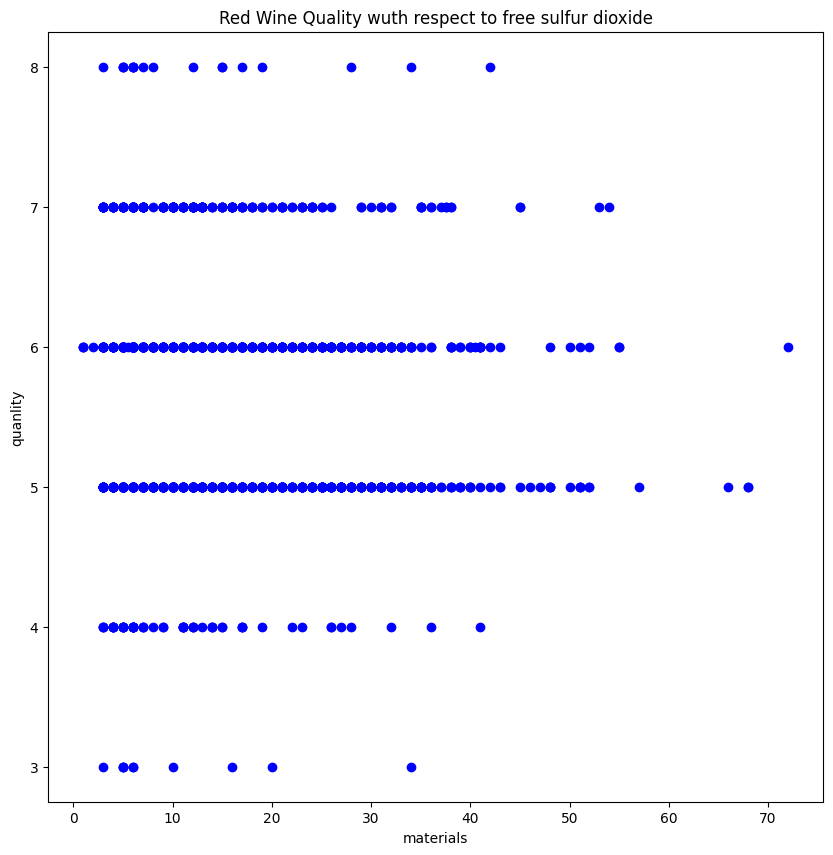

In [ ]:

x=df1['free sulfur dioxide']
y=df1['quality']
fig=plt.figure(figsize=(10,10))
plt.scatter(x,y,color="blue")
plt.xlabel("materials")
plt.ylabel("quanlity")
plt.title("Red Wine Quality wuth respect to free sulfur dioxide")
plt.show()

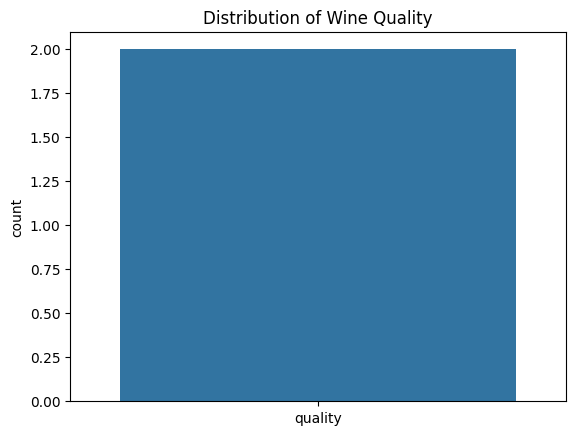

In [ ]:

# Plot the distribution of wine quality
sns.countplot(x=list(df['quality']))
plt.title('Distribution of Wine Quality')
plt.show()

Text(0.5, 1.0, 'Quality of red wine with respect to the free sulfur dioxide')

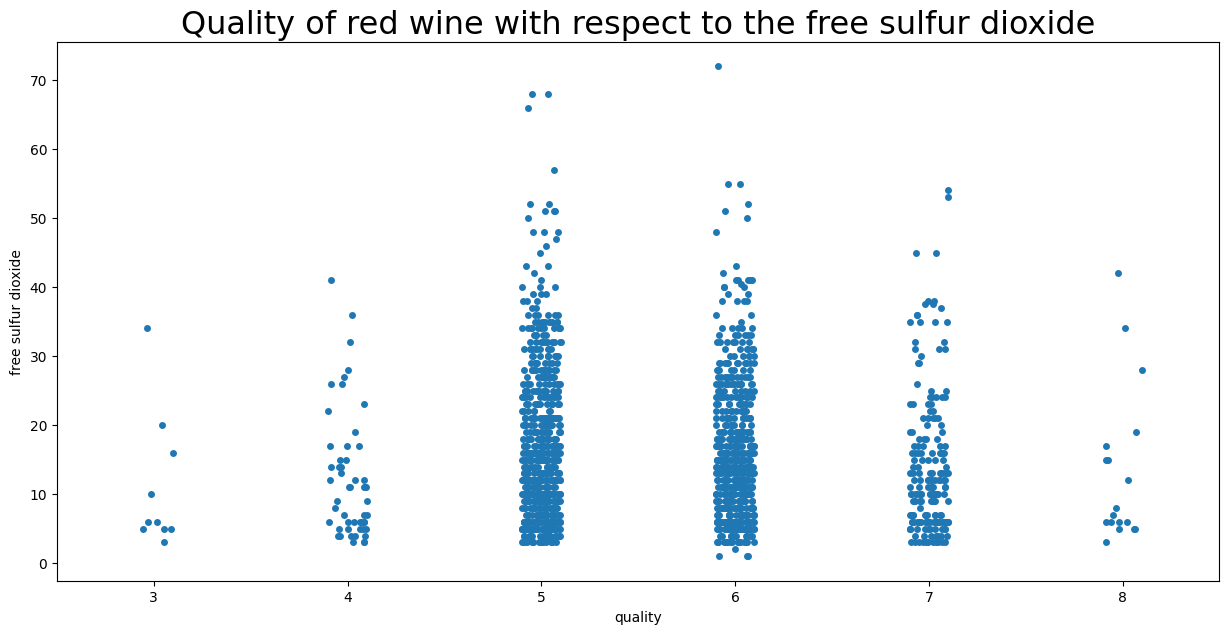

In [ ]:
plt.figure(figsize=(15,7))
sns.stripplot(x=y,y=x, data=df1, jitter=True)
plt.title('Quality of red wine with respect to the free sulfur dioxide',fontsize=23)

Text(0.5, 1.0, 'Correlation graph of each faeture For Red Wine ')

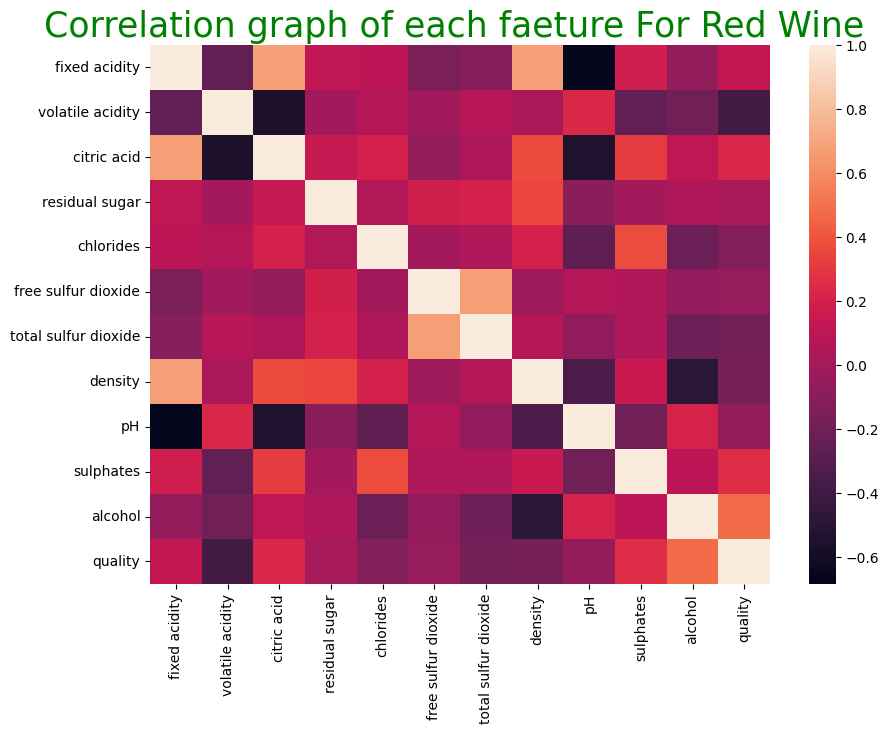

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr())
plt.title('Correlation graph of each faeture For Red Wine ',fontsize=25,color="Green")

Text(0.5, 1.0, 'Correlation graph of each faeture For White Wine ')

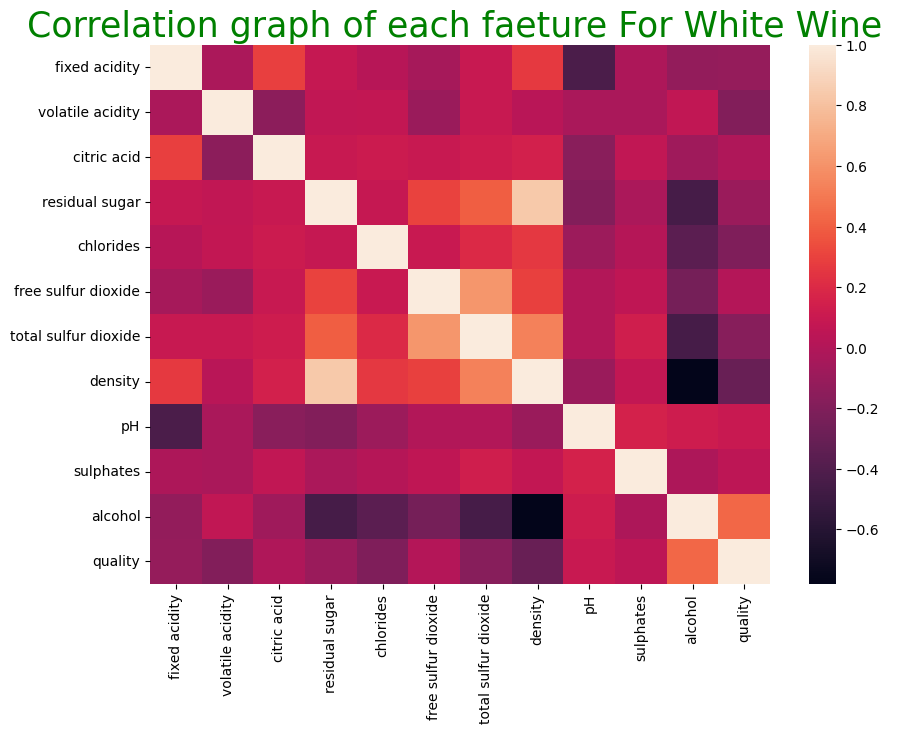

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr())
plt.title('Correlation graph of each faeture For White Wine ',fontsize=25,color="Green")

Text(0.5, 1.0, 'Count Fixed acidity with respect to the quality of red wine')

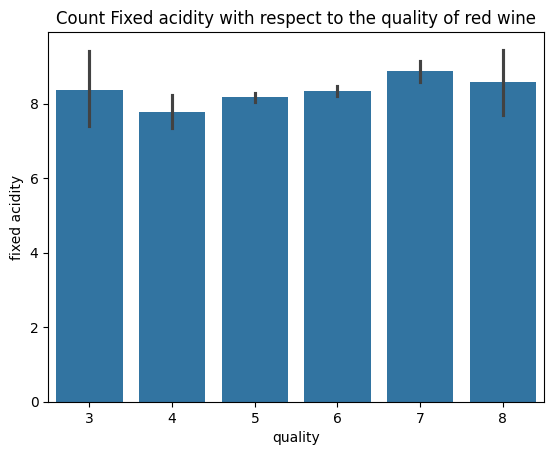

In [ ]:
x=df1['fixed acidity']
sns.barplot(x=df1['quality'],y=x)
plt.title("Count Fixed acidity with respect to the quality of red wine")

<Axes: xlabel='fixed acidity', ylabel='quality'>

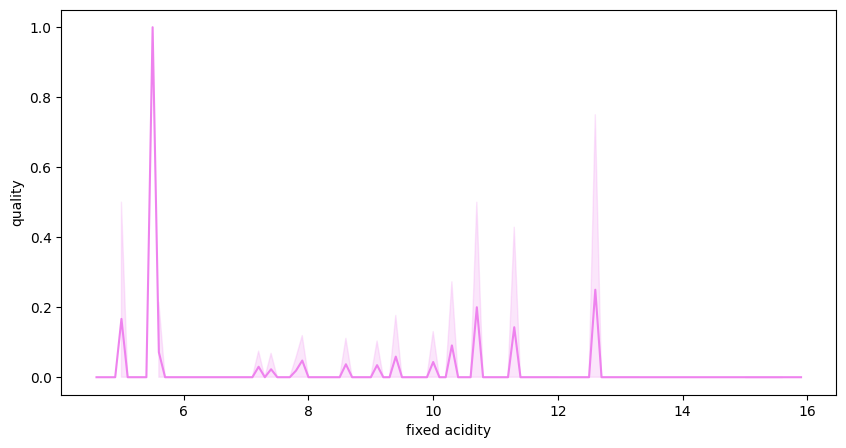

In [ ]:

x=df1['fixed acidity']
y=df1['quality']==8
fig=plt.figure(figsize=(10,5))
sns.lineplot(x=x,y=y,color='violet')

Text(0.5, 1.0, 'Density of red wine for quality')

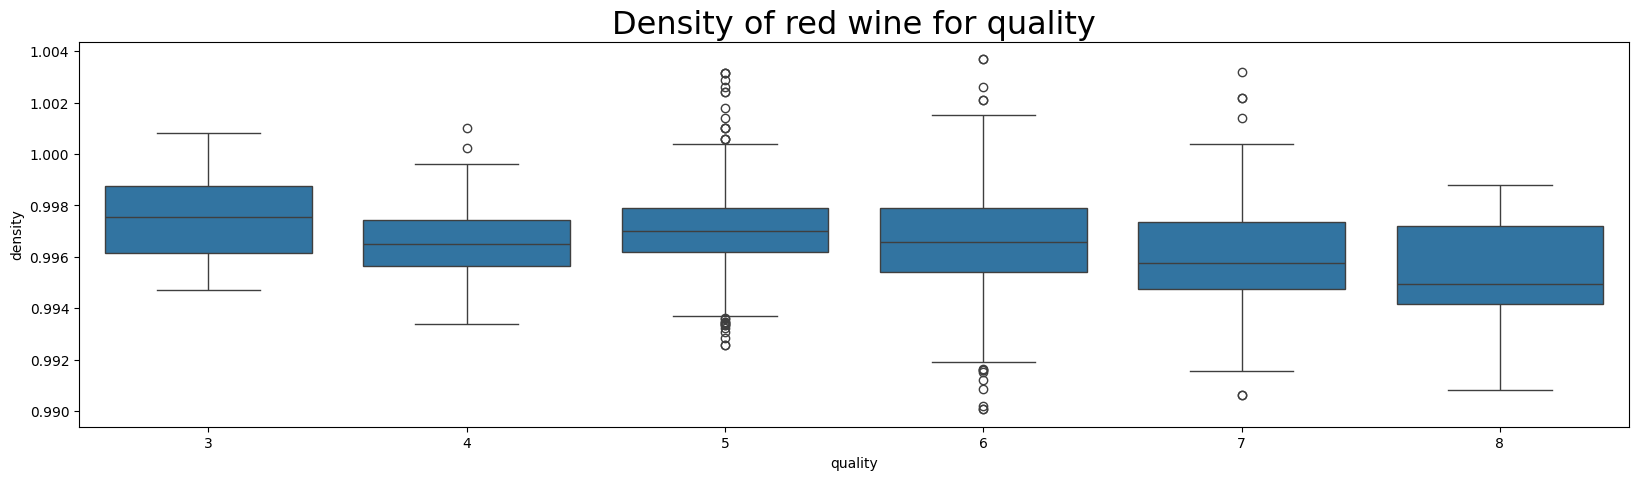

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.boxplot( x = "quality", y = "density",data = df1)
plt.title("Density of red wine for quality",fontsize=23)

In [ ]:
sns.pairplot(df1, hue='quality', size=5);
plt.title("Pairplot with respect to the Each columns",fontsize=22)

Output hidden; open in https://colab.research.google.com to view.

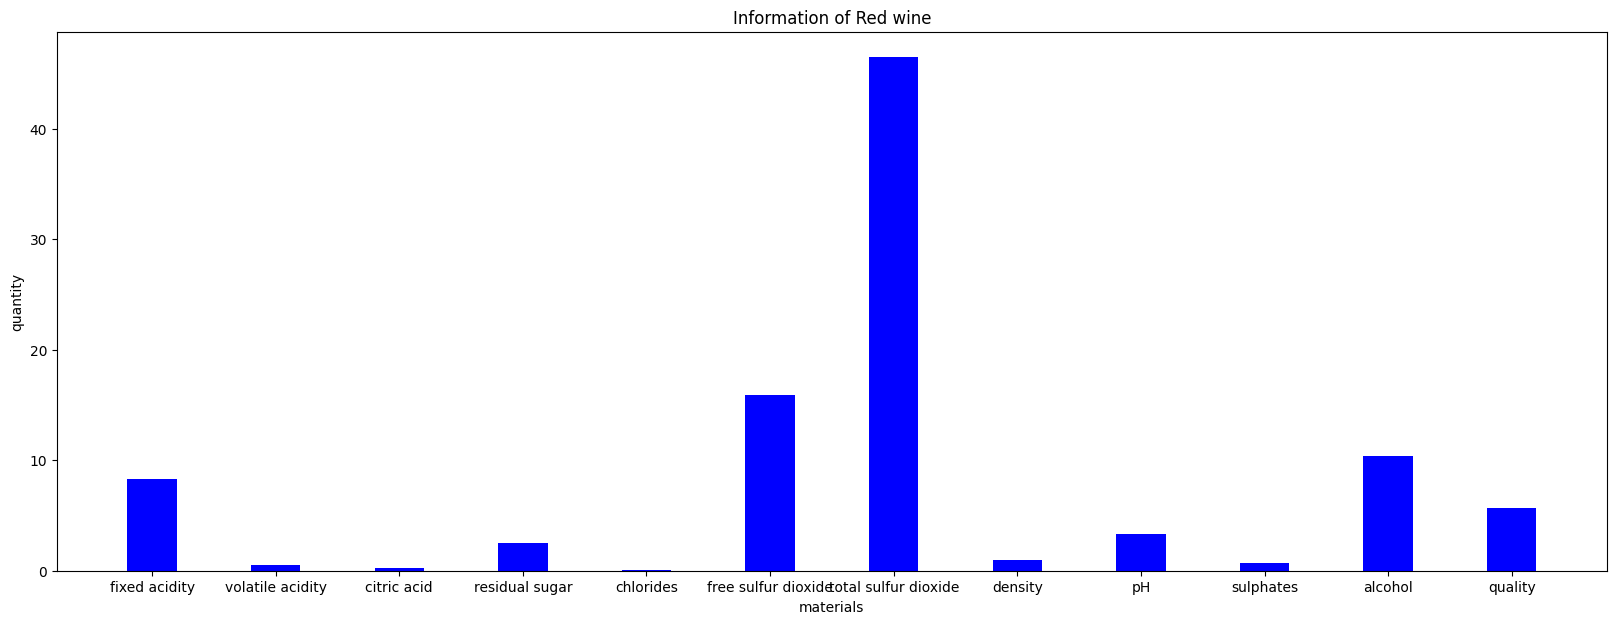

In [ ]:

y=list(df1.columns)
x=df1.mean()

fig=plt.figure(figsize=(20,7))
plt.bar(y,x,color="blue",width=0.4)
plt.xlabel("materials")
plt.ylabel("quantity")
plt.title("Information of Red wine")
plt.show()


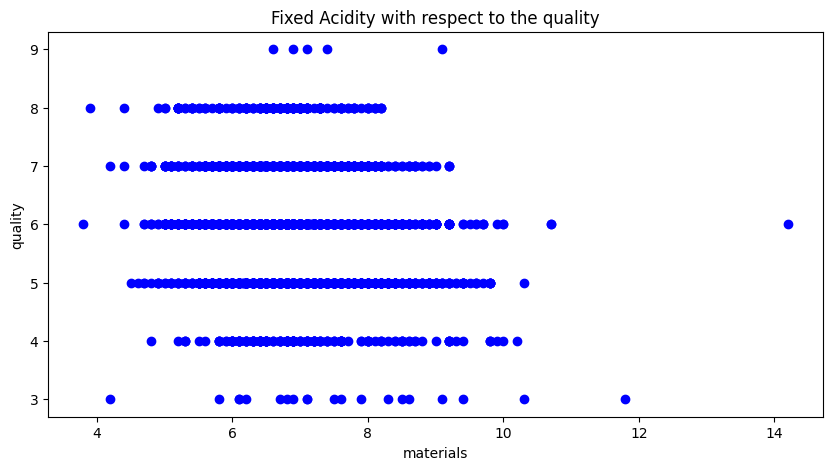

In [ ]:

x=df2['fixed acidity']
y=df2['quality']
fig=plt.figure(figsize=(10,5))
plt.scatter(x,y,color="blue")
plt.xlabel("materials")
plt.ylabel("quality")
plt.title("Fixed Acidity with respect to the quality")
plt.show()

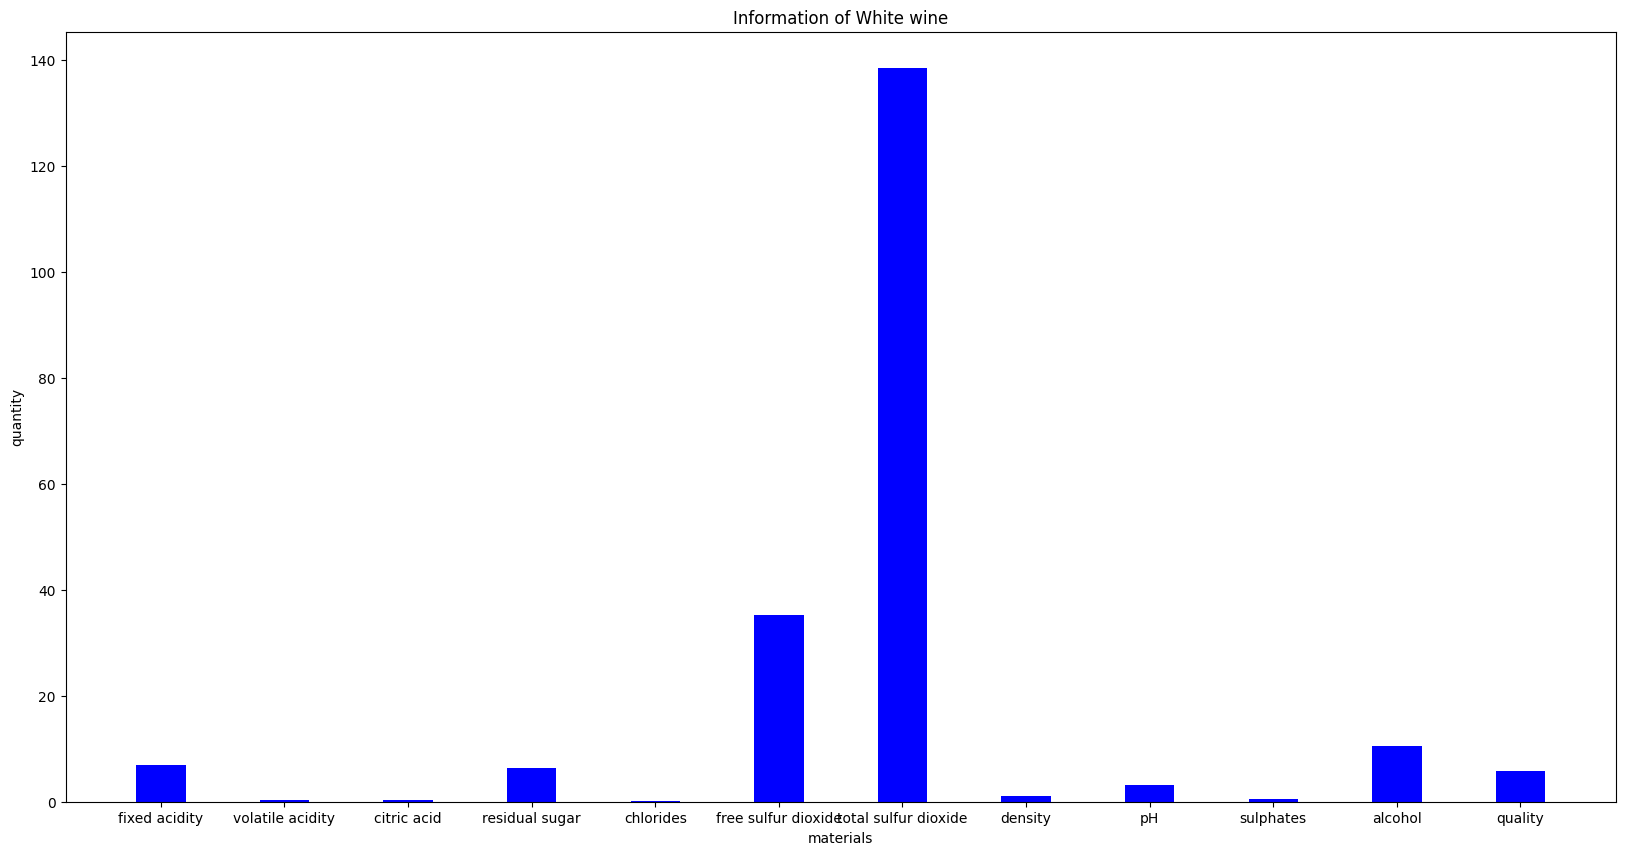

In [ ]:

y=list(df2.columns)
x=df2.mean()

fig=plt.figure(figsize=(20,10))
plt.bar(y,x,color="blue",width=0.4)
plt.xlabel("materials")
plt.ylabel("quantity")
plt.title("Information of White wine")
plt.show()


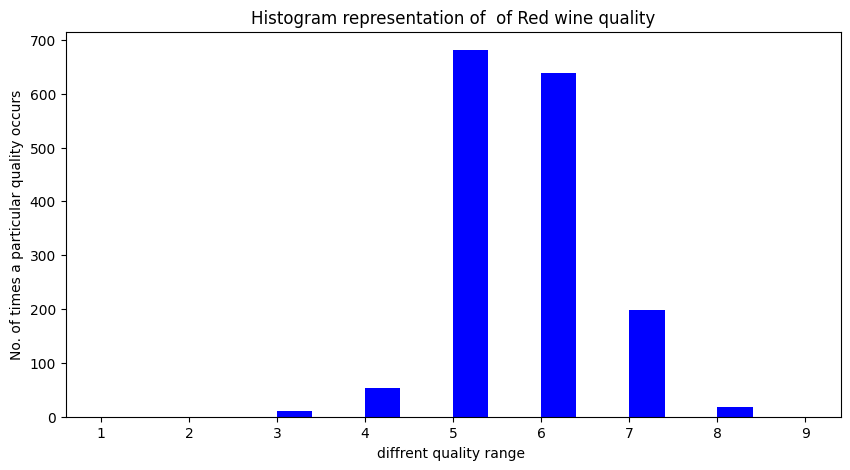

In [ ]:

x=list(df1['quality'])
bins=[1,2,3,4,5,6,7,8,9]

fig=plt.figure(figsize=(10,5))
plt.hist(x,bins,color="blue",width=0.4)
plt.xlabel("diffrent quality range ")
plt.ylabel("No. of times a particular quality occurs")
plt.title("Histogram representation of  of Red wine quality")
plt.show()


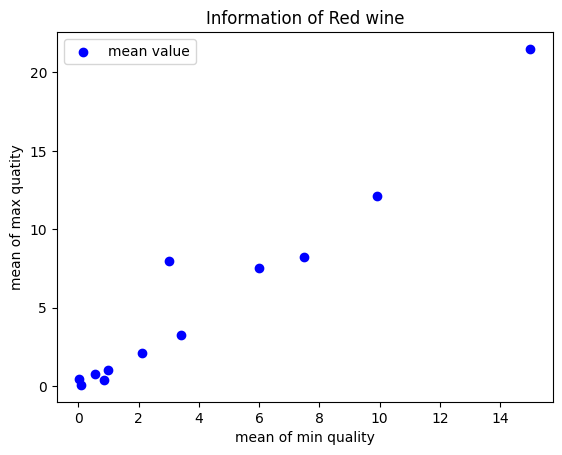

In [ ]:
x=d.get_group(3).median()
y=d.get_group(8).median()

# fig=plt.figure(figsize=(10,5))
plt.scatter(x,y,label='mean value',color="blue")
plt.xlabel("mean of min quality")
plt.ylabel("mean of max quatity")
plt.title("Information of Red wine")
plt.legend()
plt.show()


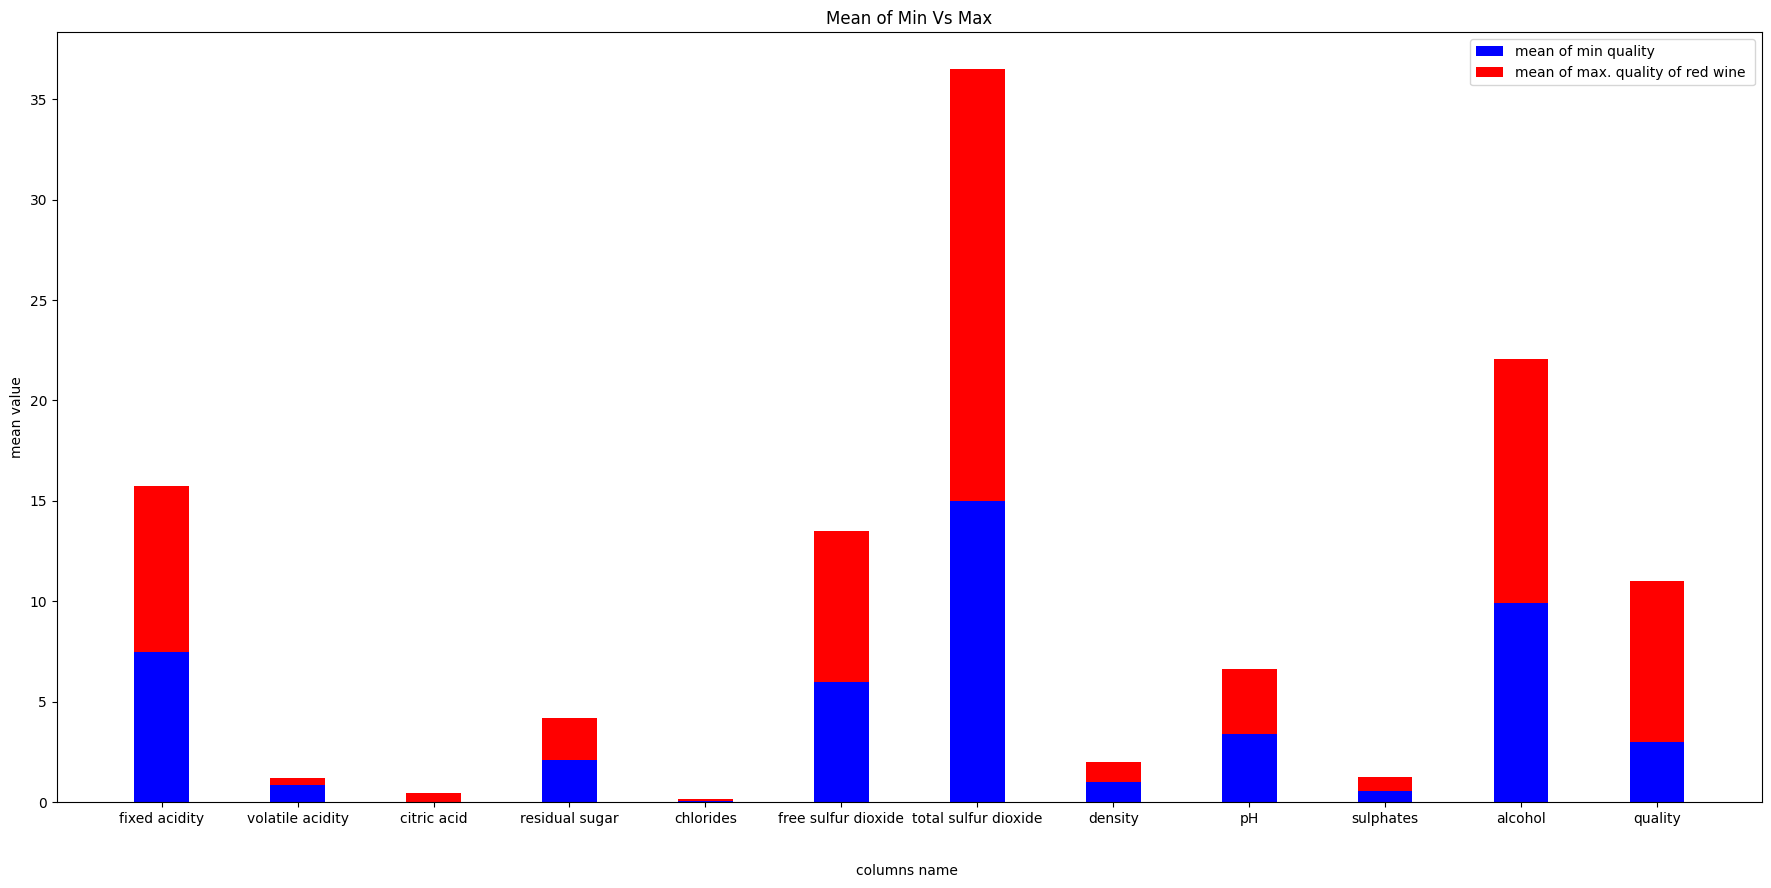

In [ ]:

columns=list(df1.columns)
width=0.4
fig=plt.figure(figsize=(22,10))
plt.bar(columns,x,width,color="blue",label="mean of min quality")
plt.bar(columns,y,width,color="red",bottom=x,label="mean of max. quality of red wine ")

plt.xlabel("\n\ncolumns name ")
plt.ylabel("mean value")
plt.title("Mean of Min Vs Max")
plt.legend()
plt.show()


# Conclusion:-
The quality of red wine is increase when the quantity of sulfur is increased,the quality of red wine decreses when the ph is decresesd,that means when so2 is increased the ph is decrese and the overall qaulity is increased.for increase quality of the red wine decrease the volatile acid

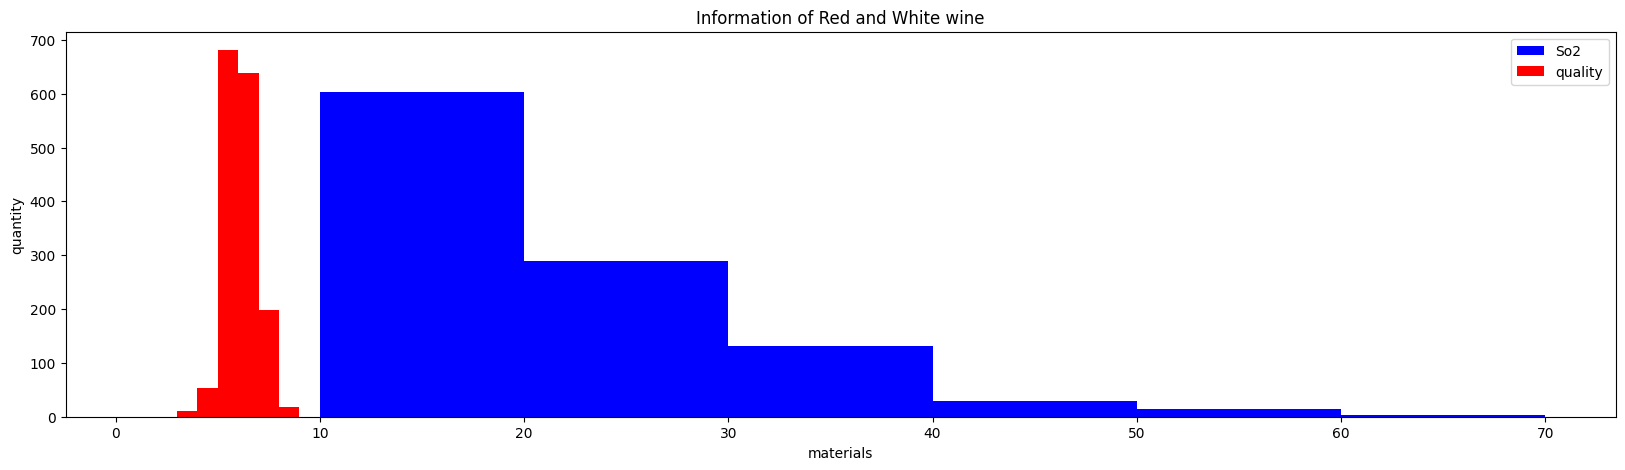

In [ ]:

bins1=[10,20,30,40,50,60,70]
bins2=[1,2,3,4,5,6,7,8,9]
w=0.4
x=list(df1['free sulfur dioxide'])
y=list(df1['quality'])
fig=plt.figure(figsize=(20,5))
plt.hist(x,bins1,w,label="So2",color="blue")
plt.hist(y,bins2,w,label="quality",color="red")
plt.xlabel("materials")
plt.ylabel("quantity")
plt.title("Information of Red and White wine")
plt.legend()
plt.show()

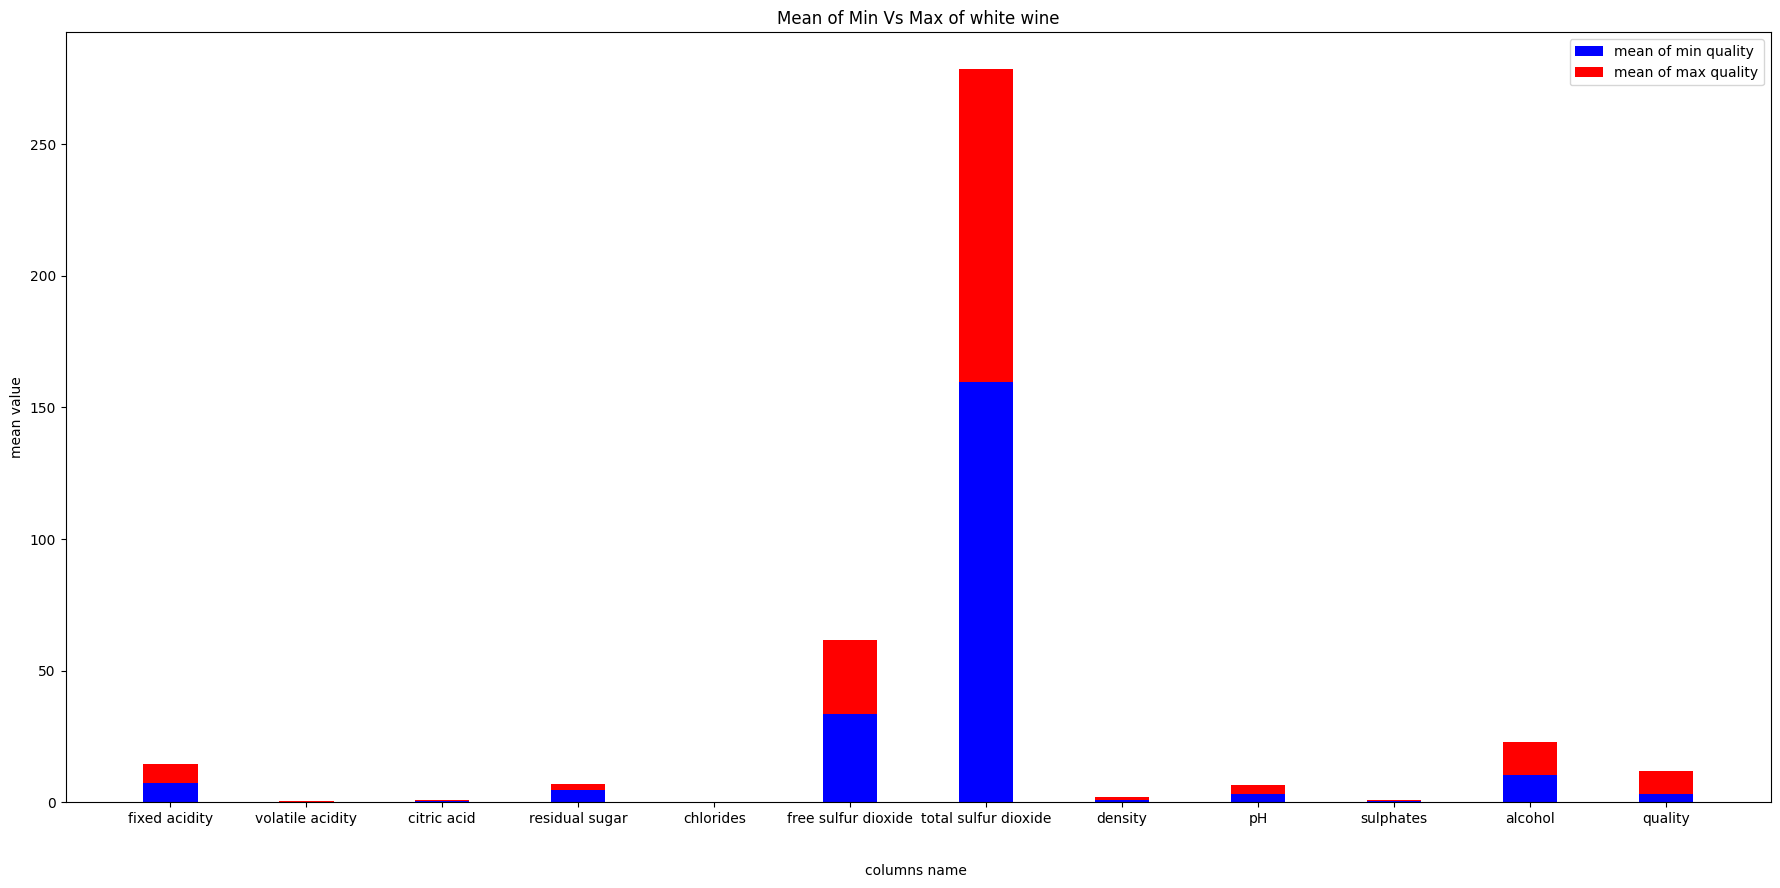

In [ ]:

columns=list(df2.columns)
width=0.4
fig=plt.figure(figsize=(22,10))
plt.bar(columns,x1,width,color="blue",label="mean of min quality")
plt.bar(columns,y1,width,color="red",bottom=x1,label="mean of max quality")

plt.xlabel("\n\ncolumns name ")
plt.ylabel("mean value")
plt.title("Mean of Min Vs Max of white wine")
plt.legend()
plt.show()

## Conclusion:-
For white wine if i decrese the value of sulfur dioxide and sugar the quality of white wine will be increased.
In both red and white wine the common element is alcohol that should be increased if you want to increase the quality of the wine.

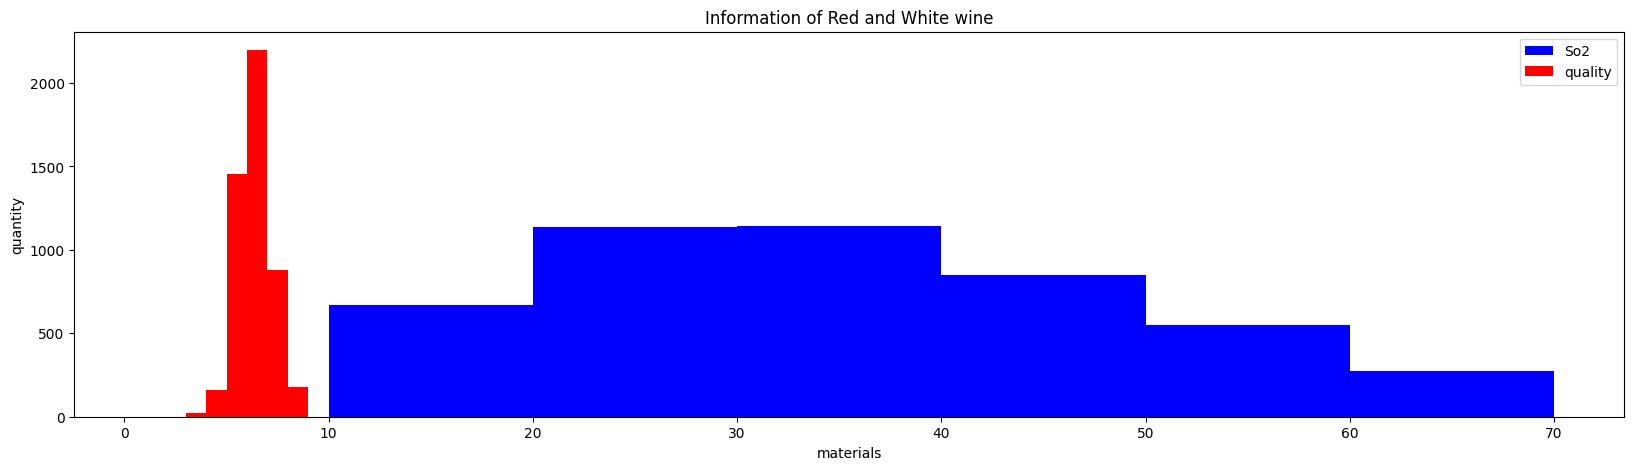

In [ ]:

bins1=[10,20,30,40,50,60,70]
bins2=[1,2,3,4,5,6,7,8,9]
width=0.4
x=list(df2['free sulfur dioxide'])
y=list(df2['quality'])
fig=plt.figure(figsize=(20,5))
plt.hist(x,bins1,w,label="So2",color="blue")
plt.hist(y,bins2,w,label="quality",color="red")
plt.xlabel("materials")
plt.ylabel("quantity")
plt.title("Information of Red and White wine")
plt.legend()
plt.show()

## EDA with AutoEDA

In [ ]:
# -------------------
# AutoEDA using Sweetviz
# -------------------


# Generate Sweetviz report
report = sv.analyze(df1)

# Save the report as HTML
report.show_html('wine_quality_sweetviz_report.html')  # Save report

# To display it inline in the notebook
report.show_notebook()



##Feature Engineering With Randomforst Regression Model

In [ ]:

# Separate features and target
X = df1.drop('quality', axis=1)
y = df1['quality']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sort feature importances
sorted_indices = importances.argsort()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.title('Feature Importances for Wine Quality')
plt.show()

# Evaluate the model (Optional)
y_pred = rf.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


### **We can see from the above model also we are getting the importnat feature as common alchohol,volatile acidity,sulfur dioxide,sugar etc..**

##Model Preparation and Selection

##Task2.Model Selection, Training, and Hyperparameter Tuning

Task: Train multiple models, tune hyperparameters, and select the best-
performing model.
Details: Utilize tools like AutoML, KizenML, or others for model selection
and hyperparameter tuning. Document the experimentation process and
justify your model choice


In [67]:
# Wine Quality Classification using TPOT for AutoML
# Jupyter Notebook format


# -------------------
# Data Collection and Preprocessing
# -------------------

# Load dataset
df1 = pd.read_csv(winequality_white_path,sep=";")  # Replace with your dataset

# Data Cleaning
df1.dropna(inplace=True)  # Removing missing data

In [69]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


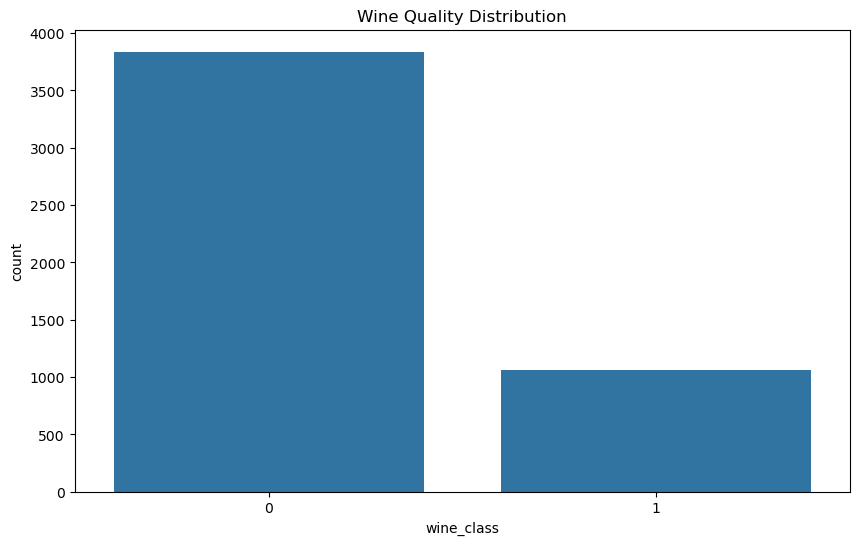

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [24]:


# Feature Engineering
df1['wine_class'] = df1['quality'].apply(lambda x: 1 if x >= 7 else (0))

# Visualize data distribution using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='wine_class', data=df1)
plt.title('Wine Quality Distribution')
plt.show()

# Data Preprocessing
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'total sulfur dioxide',
             'pH',  'alcohol']
X = df1[features]
y = df1['wine_class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling / Normalization
scaler_x = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling / Normalization
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler_x = MinMaxScaler()
scaler_x.fit(X_train)
scaled_X_train = scaler_x.transform(X_train)
scaled_X_test = scaler_x.transform(X_test)

# scaling the output data
scaler_y = MinMaxScaler()
scaler_y.fit(y_train.values.reshape(-1, 1))
scaled_y_train = scaler_y.transform(y_train.values.reshape(-1, 1))
scaled_y_train = scaled_y_train.ravel()
scaled_y_test = scaler_y.transform(y_test.values.reshape(-1, 1))
scaled_y_test = scaled_y_test.ravel()

## Model Selection and Hyperparameter Tuning with TPOT

In [20]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,pH,alcohol
736,6.6,0.25,0.30,14.40,183.0,3.02,9.1
1620,7.8,0.26,0.49,3.20,87.0,3.03,11.3
336,6.3,0.23,0.33,1.50,105.0,3.32,11.2
2302,6.0,0.26,0.18,7.00,194.0,3.21,9.0
2673,7.9,0.37,0.31,2.85,24.0,3.19,11.9
...,...,...,...,...,...,...,...
4426,6.2,0.21,0.52,6.50,123.0,3.22,9.9
466,7.0,0.14,0.32,9.00,141.0,3.22,9.4
3092,7.6,0.27,0.52,3.20,152.0,3.02,11.4
3772,6.3,0.24,0.29,13.70,134.0,3.17,10.6


In [22]:
y_train

736     0
1620    1
336     0
2302    0
2673    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: wine_class, Length: 3428, dtype: int64

In [59]:

# # Use TPOT for AutoML model selection and hyperparameter tuning
# tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)

# # Fit the TPOT model on training data
# tpot.fit(X_train_scaled, y_train)


from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=33)

rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=33)

In [63]:
rf_classifier.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8693877551020408
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1141
           1       0.84      0.52      0.64       329

    accuracy                           0.87      1470
   macro avg       0.86      0.74      0.78      1470
weighted avg       0.87      0.87      0.86      1470



In [65]:
joblib.dump(rf_classifier,'rf_classifier.pkl')

['rf_classifier.pkl']

In [14]:
# -------------------
# Model Selection and Hyperparameter Tuning with TPOT
# -------------------


# Use TPOT for AutoML model selection and hyperparameter tuning
tpot = KNN(verbosity=2, generations=5, population_size=20, random_state=42)

# Fit the TPOT model on training data
tpot.fit(X_train_scaled, y_train)

# Evaluate on test data
y_pred = tpot.predict(X_test_scaled)

# Performance evaluation


print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# -------------------
# Save the Preprocessed Data and Model
# -------------------


# Save preprocessed data and best model
processed_data = {
    'X_train': X_train_scaled,
    'X_test': X_test_scaled,
    'y_train': y_train,
    'y_test': y_test
}

# Save the best model and preprocessed data to pickle files
with open('processed_data.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

tpot.export('best_model_tpot.pkl')  # Save the best model pipeline as Python code


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8369249430742057

Generation 2 - Current best internal CV score: 0.8468455661722457

Generation 3 - Current best internal CV score: 0.8468455661722457

Generation 4 - Current best internal CV score: 0.8480134493839246

Generation 5 - Current best internal CV score: 0.8550152156795982

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=91, p=1, weights=distance)
Accuracy: 0.8693877551020408
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1141
           1       0.84      0.52      0.64       329

    accuracy                           0.87      1470
   macro avg       0.86      0.74      0.78      1470
weighted avg       0.87      0.87      0.86      1470



In [44]:
import joblib

In [50]:
joblib.dump(scaler_x,"./models/scaler_x.pkl")

['./models/scaler_x.pkl']

In [48]:
# scaler_x.export('scaler_x.pkl')  # Save the best model pipeline as Python code
# scaler_y.export('scaler_y.pkl')  # Save the best model pipeline as Python code
joblib.dump(scaler_y,"./models/scaler_y.pkl")

['./models/scaler_y.pkl']

In [ ]:
import shap
explainer = shap.Explainer(tpot.predict, X_train_scaled)
shap_values = explainer(X_test_scaled)

ExactExplainer explainer: 1471it [41:31,  1.70s/it]


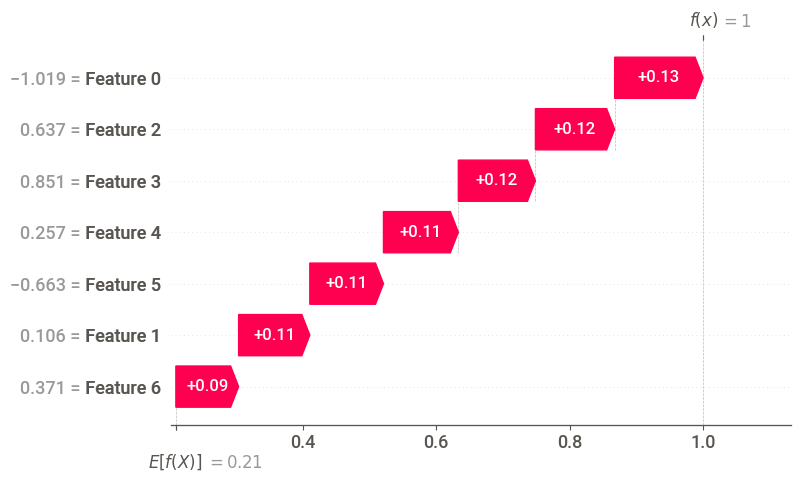

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

In [ ]:
# visualize all the training set predictions
shap.initjs()
shap.plots.force(shap_values)

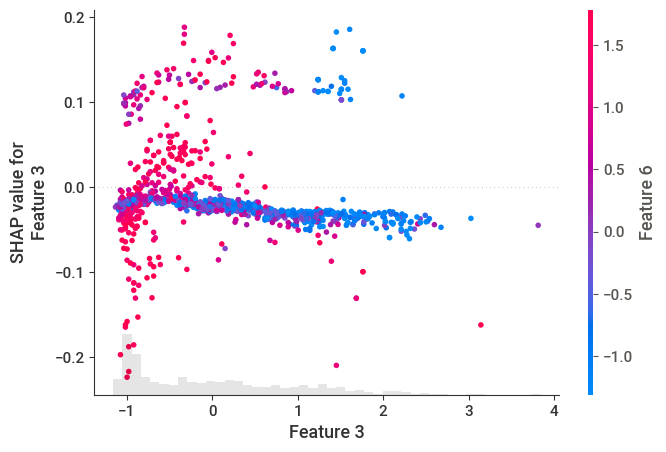

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
#shap.plots.scatter(shap_values[:,"RM"], color=shap_values)
shap.plots.scatter(shap_values[:, 3], color=shap_values)

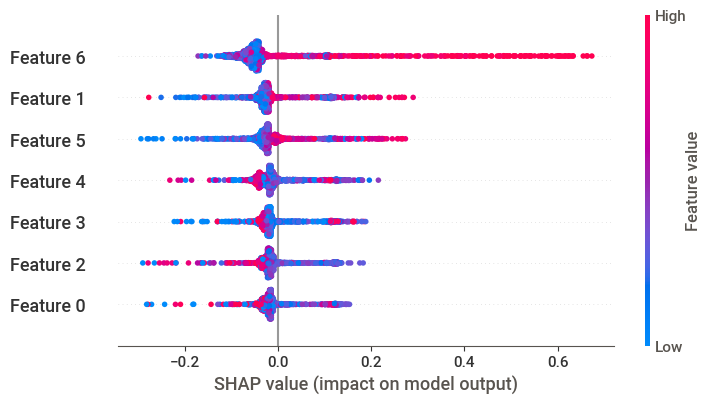

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

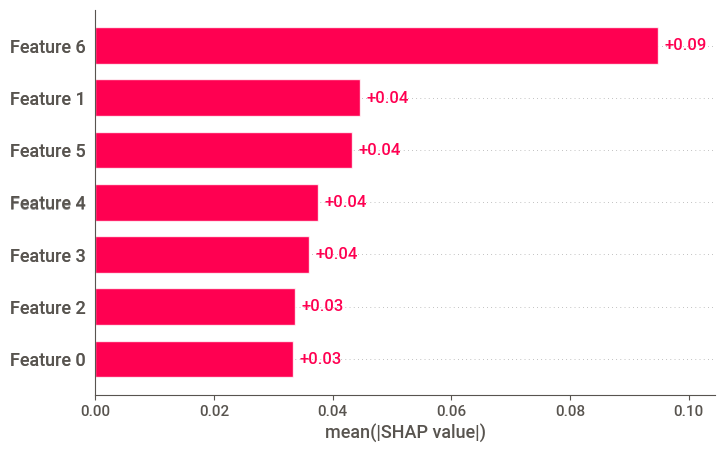

In [ ]:
#A Simple bar plot
shap.plots.bar(shap_values)

In [57]:
# get the model used by TPOT
model = tpot.fitted_pipeline_.steps[-1][1]

# check the model type
print(type(model))

# use KernelExplainer instead of TreeExplainer if model is not tree based
if not isinstance(model, ( RandomForestClassifier)):
    # use KernelExplainer for non-tree based models
    X_train_summary = shap.sample(X, 500)
    explainer = shap.KernelExplainer(tpot.predict, X_train_summary)

    shap_values = explainer.shap_values(X_train_summary)
else:
    # use TreeExplainer for tree-based models
    explainer = shap.TreeExplainer(model)
    shap_interaction_values = explainer.shap_interaction_values(X.iloc[:2000,:])



<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


  0%|          | 0/500 [00:00<?, ?it/s]

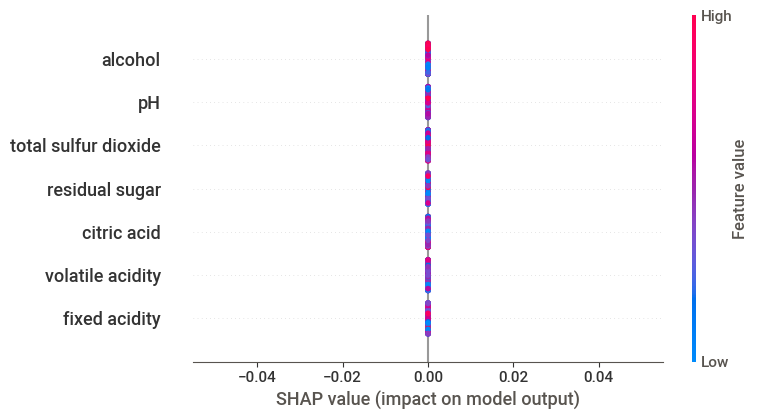

In [60]:
shap.summary_plot(shap_values, X_train_summary.iloc[:500])